<a href="https://colab.research.google.com/github/Abdulrafayshiekh/Git-Bash-Codex/blob/main/Predictive_Maintenance_System_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

def generate_sensor_data(n=1000):
    time = np.arange(n)
    vibration = np.sin(0.02 * time) + np.random.normal(0, 0.1, n)
    temperature = 70 + 5 * np.sin(0.01 * time) + np.random.normal(0, 0.5, n)
    sound = np.random.normal(0.5, 0.05, n)

    df = pd.DataFrame({
        'timestamp': time,
        'vibration': vibration,
        'temperature': temperature,
        'sound': sound
    })

    return df

# ✅ Generate and save data
if __name__ == "__main__":
    df = generate_sensor_data()
    df.to_csv('sensor_data.csv', index=False)
    print("Sensor data saved to sensor_data.csv")
    print(df.head())


Sensor data saved to sensor_data.csv
   timestamp  vibration  temperature     sound
0          0   0.076874    70.109979  0.542636
1          1  -0.171849    69.665775  0.439395
2          2  -0.313330    69.581090  0.492765
3          3   0.023790    70.465887  0.515612
4          4  -0.006774    70.379724  0.530085


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the sensor data
df = pd.read_csv('sensor_data.csv')

# Simulate RUL: assume machine fails at time = 1000
df['RUL'] = 1000 - df['timestamp']

# Optional: smooth features
df['vib_mean'] = df['vibration'].rolling(10).mean()
df['temp_std'] = df['temperature'].rolling(10).std()
df.dropna(inplace=True)


✅ RMSE (Root Mean Squared Error): 237.69
✅ R² Score: 0.29


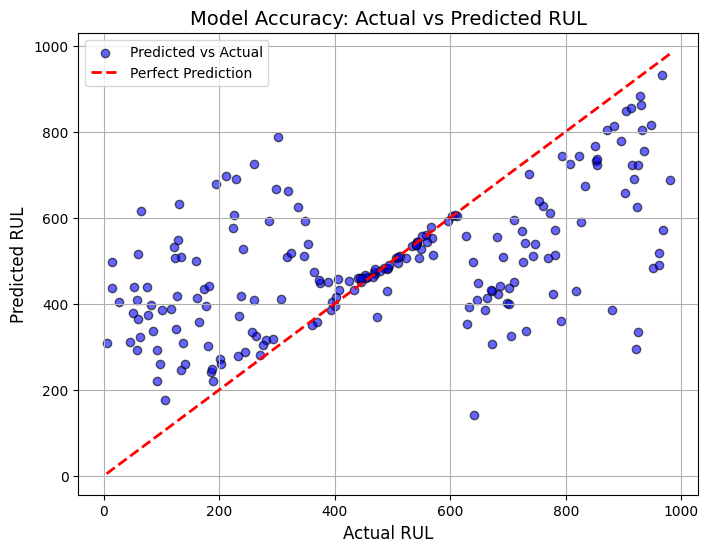

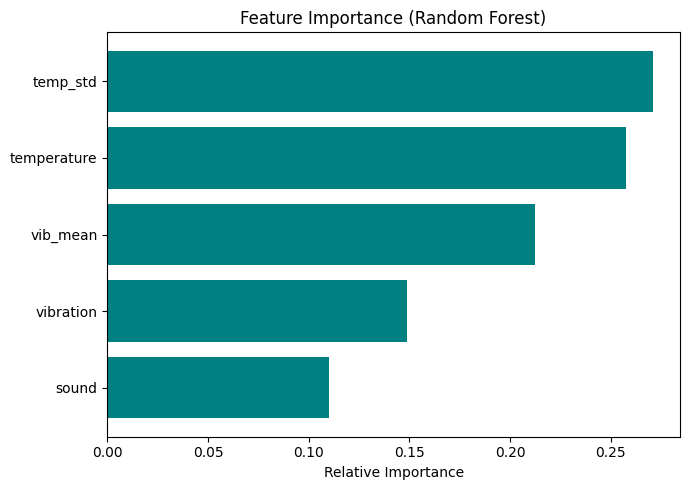

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# ====================================================
# 🔹 Step 1: Load sensor data
# ====================================================
df = pd.read_csv('sensor_data.csv')

# ====================================================
# 🔹 Step 2: Simulate Remaining Useful Life (RUL)
# ====================================================
df['RUL'] = 1000 - df['timestamp']  # assuming failure occurs at time = 1000

# ====================================================
# 🔹 Step 3: Feature Engineering
# ====================================================
df['vib_mean'] = df['vibration'].rolling(window=10).mean()
df['temp_std'] = df['temperature'].rolling(window=10).std()

# Drop NaN values from rolling windows
df.dropna(inplace=True)

# ====================================================
# 🔹 Step 4: Select Features and Target
# ====================================================
features = ['vibration', 'temperature', 'sound', 'vib_mean', 'temp_std']
X = df[features]
y = df['RUL']

# ====================================================
# 🔹 Step 5: Feature Scaling
# ====================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ====================================================
# 🔹 Step 6: Train-Test Split
# ====================================================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ====================================================
# 🔹 Step 7: Train Random Forest Regressor
# ====================================================
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ====================================================
# 🔹 Step 8: Make Predictions and Evaluate
# ====================================================
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"✅ R² Score: {r2:.2f}")

# ====================================================
# 🔹 Step 9: Visualization - Accuracy Check Plot
# ====================================================
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='k', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual RUL', fontsize=12)
plt.ylabel('Predicted RUL', fontsize=12)
plt.title('Model Accuracy: Actual vs Predicted RUL', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# ====================================================
# 🔹 Step 10: Optional - Feature Importance Plot
# ====================================================
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(7, 5))
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


In [4]:
import sklearn
print(sklearn.__version__)


1.6.1
